In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Código inspirado en ejemplo introductorio https://www.geeksforgeeks.org/machine-learning/k-means-clustering-introduction/

In [9]:
# Primero se deben asignar los puntos
points = {
    "A": (2, 10),
    "B": (2, 5),
    "C": (8, 4),
    "D": (5, 8),
    "E": (7, 5),
    "F": (6, 4),
    "G": (1, 2),
    "H": (4, 9)
}

In [10]:
# Luego se asignan los centroides iniciales
centroids = {
    0: points["A"],  # Cluster 1
    1: points["D"],  # Cluster 2
    2: points["G"]   # Cluster 3
}

In [11]:

# Función para calcular la distancia euclidiana
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


In [12]:
# Función para asignar puntos a los clusters más cercanos
def assign_clusters(points, centroids):
    clusters = {0: [], 1: [], 2: []}
    for point_name, point_coords in points.items():
        distances = [euclidean_distance(point_coords, centroids[c]) for c in centroids]
        cluster = np.argmin(distances)
        clusters[cluster].append(point_name)
    return clusters

In [13]:
# Función para actualizar los centroides
def update_centroids(clusters, points):
    new_centroids = {}
    for cluster, point_names in clusters.items():
        cluster_points = np.array([points[name] for name in point_names])
        new_centroids[cluster] = tuple(cluster_points.mean(axis=0))
    return new_centroids

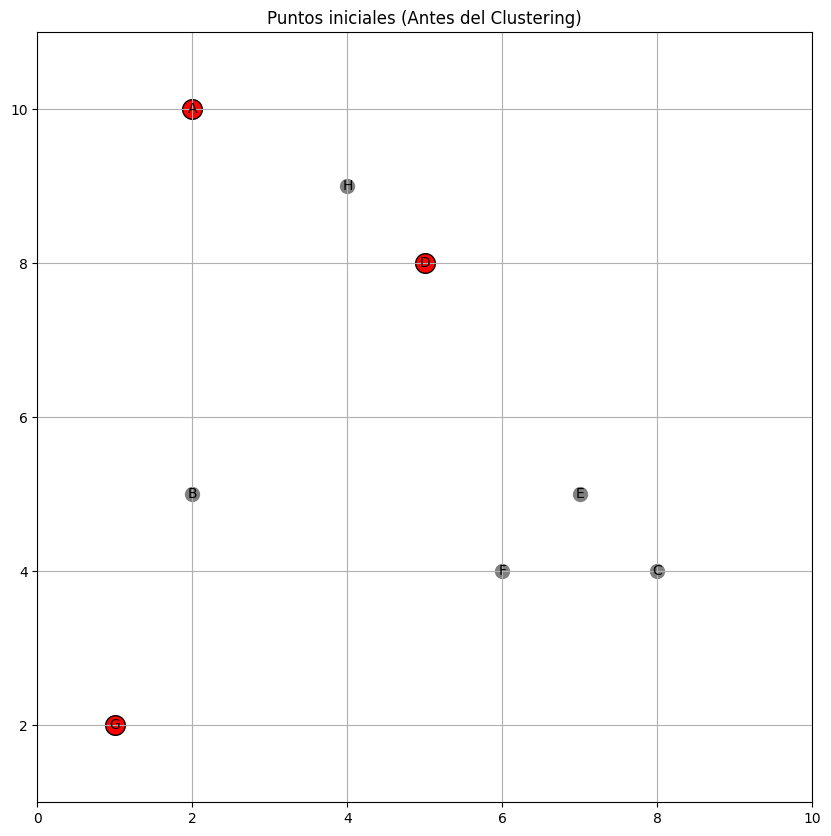

Iteration 1
Cluster 1: ['A']
Cluster 2: ['C', 'D', 'E', 'F', 'H']
Cluster 3: ['B', 'G']
New Centroids: {0: (2.0, 10.0), 1: (6.0, 6.0), 2: (1.5, 3.5)}


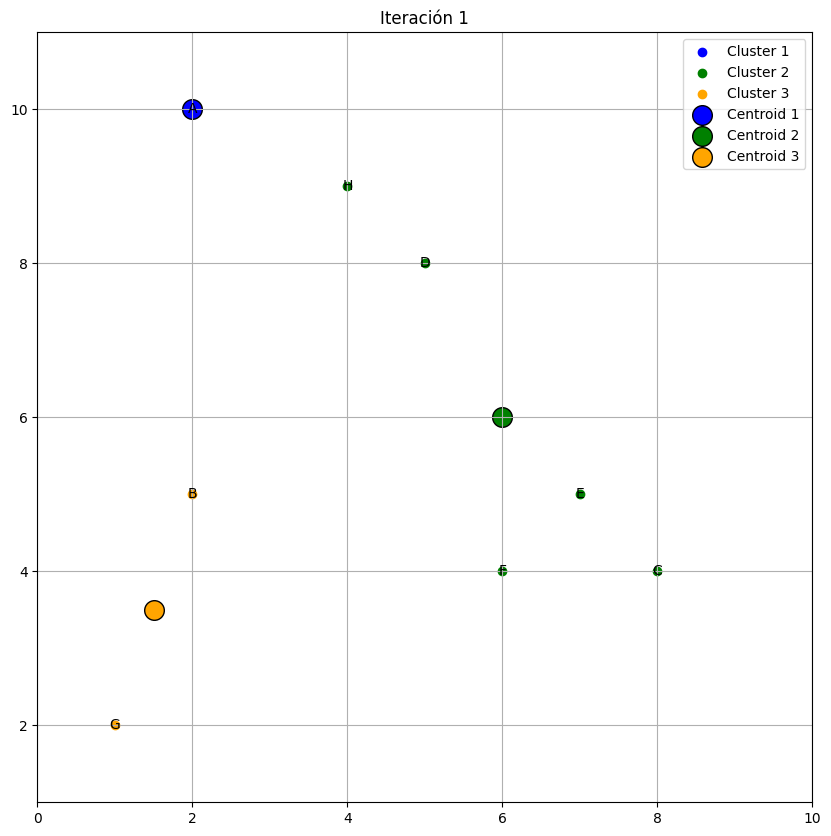

Iteration 2
Cluster 1: ['A', 'H']
Cluster 2: ['C', 'D', 'E', 'F']
Cluster 3: ['B', 'G']
New Centroids: {0: (3.0, 9.5), 1: (6.5, 5.25), 2: (1.5, 3.5)}


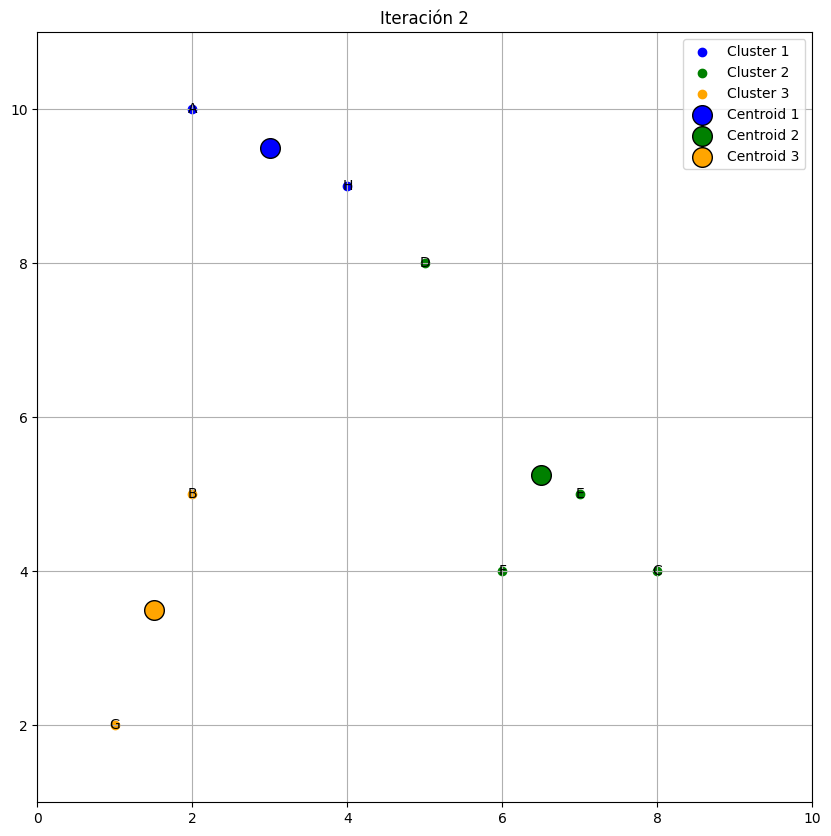

Iteration 3
Cluster 1: ['A', 'D', 'H']
Cluster 2: ['C', 'E', 'F']
Cluster 3: ['B', 'G']
New Centroids: {0: (3.6666666666666665, 9.0), 1: (7.0, 4.333333333333333), 2: (1.5, 3.5)}


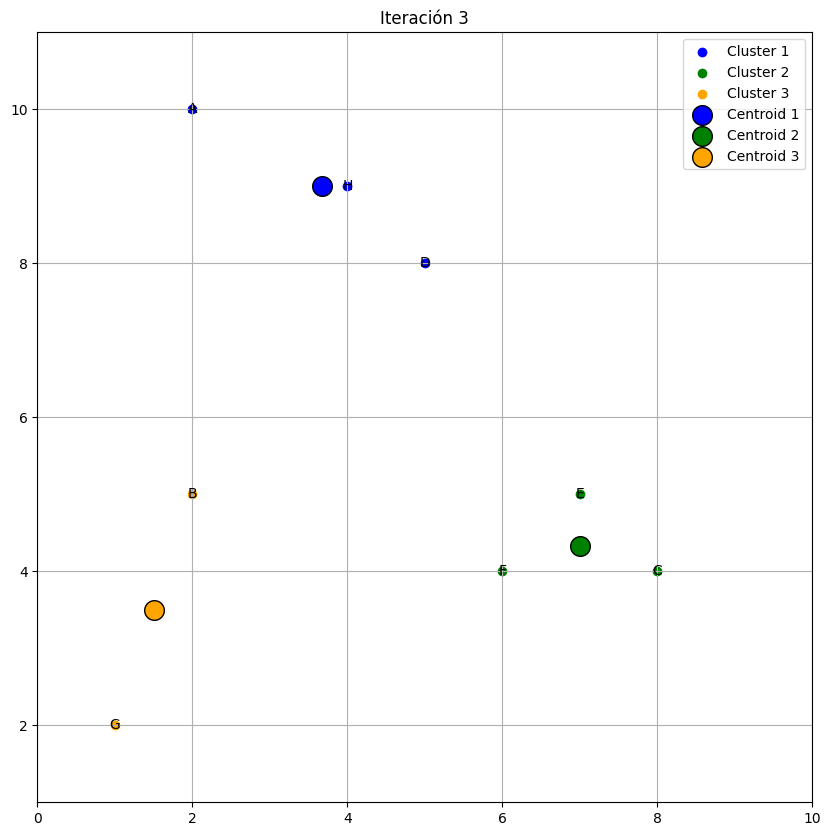

In [14]:
# Dibujar los puntos y los clusters
def plot_clusters(points, clusters, centroids, iteration):
    colors = ['blue', 'green', 'orange']
    plt.figure(figsize=(10, 10))
    plt.grid(True)
    
    # Ajustar límites dinámicamente (Esto para que el gráfico se vea bien), asegurando 10 puntos en cada eje (Como se pide en el enunciado)
    x_coords, y_coords = zip(*points.values())
    x_min, x_max = min(x_coords) - 1, max(x_coords) + 1
    y_min, y_max = min(y_coords) - 1, max(y_coords) + 1
    if x_max - x_min < 10:
        x_max = x_min + 10
    if y_max - y_min < 10:
        y_max = y_min + 10
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Dibujar los puntos con su letra y color de clúster
    for cluster, point_names in clusters.items():
        cluster_points = np.array([points[name] for name in point_names])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster+1}", color=colors[cluster])
        for name, coords in zip(point_names, cluster_points):
            plt.text(coords[0], coords[1], name, fontsize=10, color='black', ha='center', va='center')
    
    # Dibujar los centroides con el color de su cluster
    for cluster, centroid in centroids.items():
        plt.scatter(centroid[0], centroid[1], color=colors[cluster], s=200, edgecolor='black', label=f"Centroid {cluster+1}")
    
    plt.title(f"Iteración {iteration}")
    plt.legend(loc='upper right')
    plt.show()

# Dibujar los puntos originales antes del clustering, destacando A, D y G como centroides iniciales
def plot_initial_points_with_centroids(points, centroids):
    plt.figure(figsize=(10, 10))
    plt.grid(True)
    
    # Ajustar límites dinámicamente, asegurando al menos 10 puntos en cada eje
    x_coords, y_coords = zip(*points.values())
    x_min, x_max = min(x_coords) - 1, max(x_coords) + 1
    y_min, y_max = min(y_coords) - 1, max(y_coords) + 1
    if x_max - x_min < 10:
        x_max = x_min + 10
    if y_max - y_min < 10:
        y_max = y_min + 10
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Dibujar todos los puntos con sus letras
    for name, coords in points.items():
        plt.scatter(coords[0], coords[1], color='gray', s=100)
        plt.text(coords[0], coords[1], name, fontsize=10, color='black', ha='center', va='center')
    
    # Destacar los puntos A, D y G como centroides iniciales
    for centroid_name, centroid_coords in centroids.items():
        plt.scatter(centroid_coords[0], centroid_coords[1], color='red', s=200, edgecolor='black')
    
    plt.title("Puntos iniciales (Antes del Clustering)")
    plt.show()

# Llamar a la función para graficar los puntos iniciales con centroides
plot_initial_points_with_centroids(points, {"A": points["A"], "D": points["D"], "G": points["G"]})

# Ejecutar el algoritmo K-means por 3 iteraciones o hasta que converja
previous_centroids = None
for iteration in range(1, 4):
    print(f"Iteration {iteration}")
    clusters = assign_clusters(points, centroids)
    for cluster, point_names in clusters.items():
        print(f"Cluster {cluster+1}: {point_names}")
    new_centroids = update_centroids(clusters, points)
    print(f"New Centroids: {new_centroids}")
    
    # Verificar convergencia
    if previous_centroids == new_centroids:
        print("El algoritmo ha convergido.")
        break
    previous_centroids = new_centroids
    centroids = new_centroids
    plot_clusters(points, clusters, centroids, iteration)